In [1]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

/Users/arch/opt/anaconda3/envs/hml_project/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

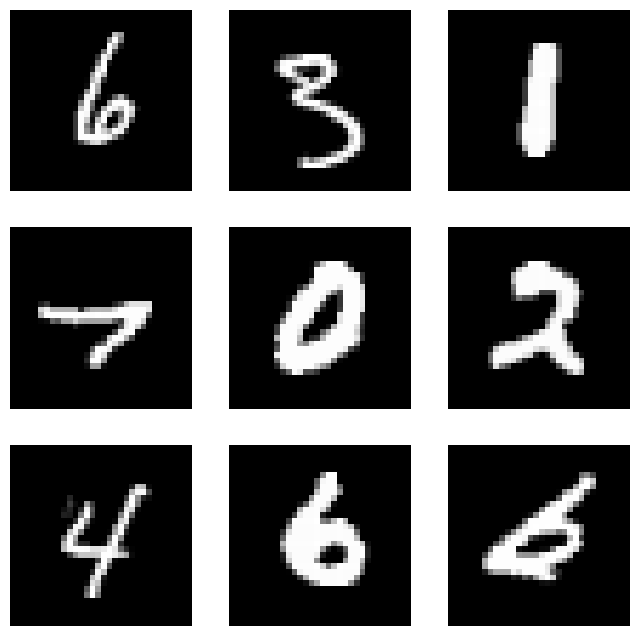

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
from data_loading import permute_train_test_data

In [6]:
training_permutations , test_permutations = permute_train_test_data(list(mnist_trainset)[:1000],list(mnist_testset)[:1000])

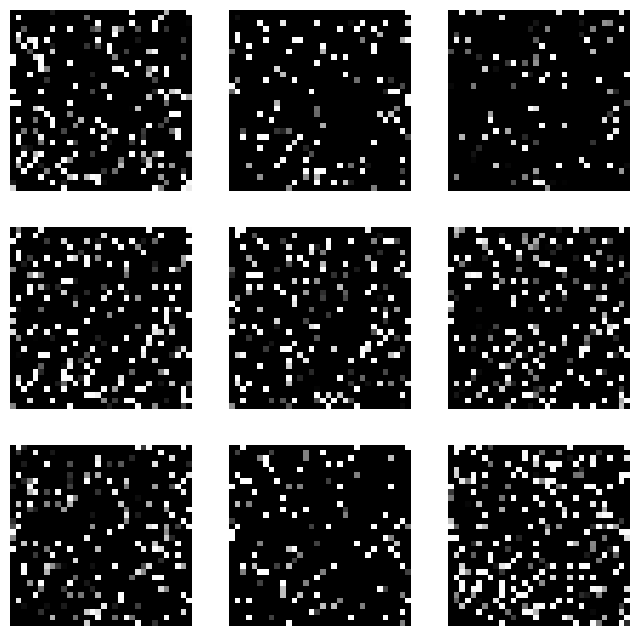

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_permutations[0]), size=(1,)).item()
    img, label = training_permutations[0][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from EWC_model import *
from train import * 

In [9]:
# -conv-layers
'''
        depth=depth,
        conv_type=args.conv_type if depth>0 else None,
        start_channels=args.channels if depth>0 else None,
        reducing_layers=args.rl if depth>0 else None,
        num_blocks=args.n_blocks if depth>0 else None,
        conv_bn=(True if args.conv_bn=="yes" else False) if depth>0 else None,
        conv_nl=args.conv_nl if depth>0 else None,
        no_fnl=True if depth>0 else None,
        global_pooling=checkattr(args, 'gp') if depth>0 else None,
'''
model = Classifier(
        image_size=32*32,
        image_channels=1,
        classes=10,
        # -fc-layers
        fc_units=400,
        fc_drop=0.2,
        fc_bn=True

    )

[LinearExcitability(in_features=1024, out_features=400), LinearExcitability(in_features=400, out_features=400), LinearExcitability(in_features=400, out_features=10)]


In [10]:
model.fisher_n = None
model.fisher_labels = 'all'
model.fisher_batch = 1
# -options relating to 'Offline EWC' (Kirkpatrick et al., 2017) and 'Online EWC' (Schwarz et al., 2018)
model.offline = True
model.weight_penalty = True
model.reg_strength = 1

In [11]:
train_cl(model, training_permutations, iters=500, batch_size=32)

context:   0%|          | 0/10 [00:00<?, ?it/s]

1


accuracy for iteration  0  : 0.6884765625


accuracy for iteration  100  : 0.9658203125


Iterations: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]


fisher estimation start


context:  10%|█         | 1/10 [00:47<07:05, 47.32s/it]

2


accuracy for iteration  0  : 0.17578125


accuracy for iteration  100  : 0.7744140625


Iterations: 100%|██████████| 200/200 [00:46<00:00,  4.29it/s]


fisher estimation start


context:  20%|██        | 2/10 [01:45<07:09, 53.63s/it]

3


accuracy for iteration  0  : 0.1171875


accuracy for iteration  100  : 0.712890625


Iterations: 100%|██████████| 200/200 [00:57<00:00,  3.50it/s]


fisher estimation start


context:  30%|███       | 3/10 [02:54<07:03, 60.51s/it]

4


accuracy for iteration  0  : 0.1396484375


accuracy for iteration  100  : 0.7802734375


Iterations: 100%|██████████| 200/200 [03:30<00:00,  1.05s/it]


fisher estimation start


context:  40%|████      | 4/10 [06:36<12:25, 124.31s/it]

5


accuracy for iteration  0  : 0.1396484375


accuracy for iteration  100  : 0.7529296875


Iterations: 100%|██████████| 200/200 [01:17<00:00,  2.57it/s]


fisher estimation start


context:  50%|█████     | 5/10 [08:06<09:20, 112.00s/it]

6


accuracy for iteration  0  : 0.1181640625


accuracy for iteration  100  : 0.7607421875


Iterations: 100%|██████████| 200/200 [01:30<00:00,  2.22it/s]


fisher estimation start


context:  60%|██████    | 6/10 [09:48<07:14, 108.69s/it]

7


accuracy for iteration  0  : 0.1376953125


accuracy for iteration  100  : 0.75


Iterations: 100%|██████████| 200/200 [01:42<00:00,  1.94it/s]


fisher estimation start


context:  70%|███████   | 7/10 [11:43<05:31, 110.64s/it]

8


accuracy for iteration  0  : 0.1005859375


accuracy for iteration  100  : 0.75390625


Iterations: 100%|██████████| 200/200 [01:58<00:00,  1.68it/s]


fisher estimation start


context:  80%|████████  | 8/10 [13:54<03:54, 117.13s/it]

9


accuracy for iteration  0  : 0.146484375


accuracy for iteration  100  : 0.7685546875


Iterations: 100%|██████████| 200/200 [02:04<00:00,  1.60it/s]


fisher estimation start


context:  90%|█████████ | 9/10 [16:11<02:03, 123.34s/it]

10


accuracy for iteration  0  : 0.1298828125


accuracy for iteration  100  : 0.73828125


context: 100%|██████████| 10/10 [18:25<00:00, 110.60s/it]


In [12]:
for i, test_set in enumerate(tqdm(test_permutations)):
    test_loader = DataLoader(test_set,batch_size=256, shuffle=True)
    acc = []
    for batch_idx, (data, y) in enumerate(tqdm(test_loader)):
            # Perform training-step on this batch
            y_hat = model(data)
            acc.append((y == y_hat.max(1)[1]).sum().item() / data.size(0))
    print("Accuracy for context ", i , "is : ", np.mean(acc))

100%|██████████| 4/4 [00:00<00:00, 94.26it/s]


Accuracy for context  0 is :  0.10136045258620689


100%|██████████| 4/4 [00:00<00:00, 103.70it/s]


Accuracy for context  1 is :  0.07886584051724138


 30%|███       | 3/10 [00:00<00:00, 23.71it/s]

Accuracy for context  2 is :  0.1376953125


100%|██████████| 4/4 [00:00<00:00, 98.80it/s]


Accuracy for context  3 is :  0.14446390086206895


100%|██████████| 4/4 [00:00<00:00, 110.93it/s]


Accuracy for context  4 is :  0.15244477370689655


 60%|██████    | 6/10 [00:00<00:00, 24.38it/s]

Accuracy for context  5 is :  0.12008351293103448


100%|██████████| 4/4 [00:00<00:00, 104.02it/s]


Accuracy for context  6 is :  0.1801252693965517


100%|██████████| 4/4 [00:00<00:00, 115.06it/s]


Accuracy for context  7 is :  0.4092807112068966


 90%|█████████ | 9/10 [00:00<00:00, 24.87it/s]

Accuracy for context  8 is :  0.578192349137931


100%|██████████| 10/10 [00:00<00:00, 24.61it/s]

Accuracy for context  9 is :  0.7685546875
